First 5 rows of the dataset : 
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')
Index(['Store', 'Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment'],
      dtype='object')


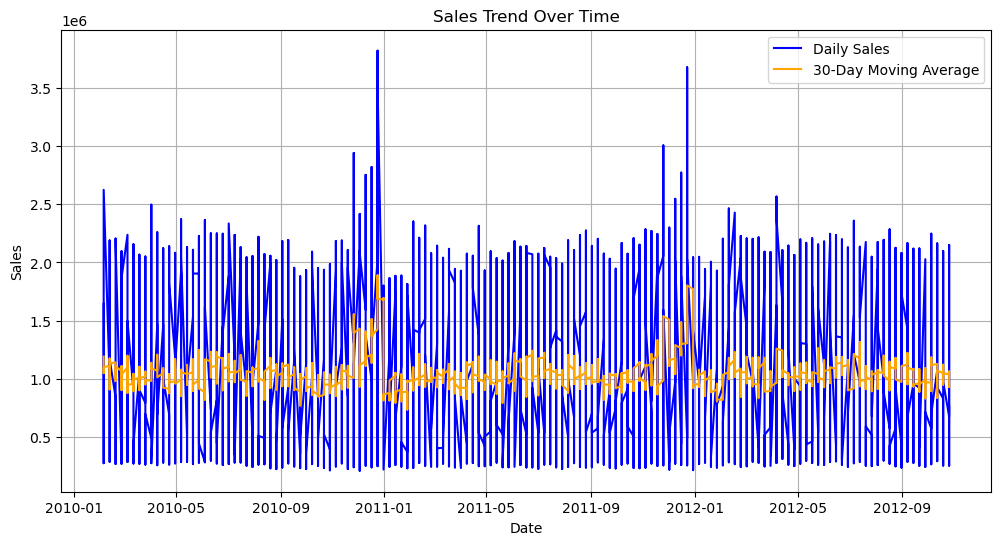

C:\Users\NAVADEEP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\NAVADEEP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\NAVADEEP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\NAVADEEP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction

RMSE: 614584.76
MAPE: 99.16%


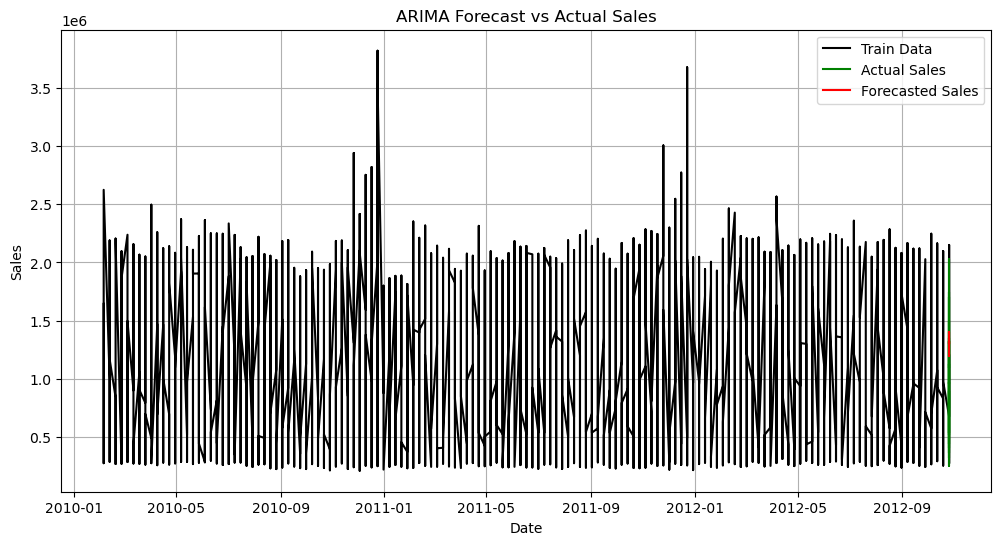


Forecasted Sales:
        Date  Forecasted_Sales
0 2012-10-26      1.309845e+06
1 2012-10-26      1.397363e+06
2 2012-10-26      1.401223e+06
3 2012-10-26      1.353777e+06
4 2012-10-26      1.195340e+06


In [10]:
# Task 6
#  1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from datetime import timedelta

#  2. Load the Dataset
df = pd.read_csv("C:/Users/NAVADEEP/OneDrive/Pictures/Documents/Main flow/Task 6/sales.csv")
print("First 5 rows of the dataset : ")
print(df.head())
#  3. Preprocess Data
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

print(df.columns)
df.rename(columns={'Weekly_Sales': 'Sales'}, inplace=True)
print(df.columns)
#  4. Visualize Sales Trends
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Daily Sales', color='blue')
plt.plot(df['Sales'].rolling(window=30).mean(), label='30-Day Moving Average', color='orange')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

#  5. Train-Test Split (last 30 days as test)
train = df.iloc[:-30]
test = df.iloc[-30:]

#  6. Fit ARIMA Model
model = ARIMA(train['Sales'], order=(5,1,0))  # (p,d,q) can be tuned
fitted_model = model.fit()

#  7. Forecast
forecast = fitted_model.forecast(steps=30)
forecast.index = test.index  # Align index

#  8. Evaluation
rmse = np.sqrt(mean_squared_error(test['Sales'], forecast))
mape = mean_absolute_percentage_error(test['Sales'], forecast)

print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape*100:.2f}%")

#  9. Forecasting Plot
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Sales'], label='Train Data', color='black')
plt.plot(test.index, test['Sales'], label='Actual Sales', color='green')
plt.plot(forecast.index, forecast, label='Forecasted Sales', color='red')
plt.title('ARIMA Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

#  10. Deliverable: Forecasted Sales Table
forecast_df = pd.DataFrame({
    'Date': forecast.index,
    'Forecasted_Sales': forecast.values
})
print("\nForecasted Sales:")
print(forecast_df.head())


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import joblib

# 1. Load the Dataset
print("Loading dataset...")
df = pd.read_csv("C:/Users/NAVADEEP/OneDrive/Pictures/Documents/Main flow/Task 6/heart_disease.csv")

# Check for missing or inconsistent data
print("\nChecking for missing values:")
print(df.isnull().sum())

print("\nChecking for duplicate rows:")
print(f"Duplicates found: {df.duplicated().sum()}")

# Clean the dataset
df.drop_duplicates(inplace=True)
df.dropna(subset=['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'Heart_ stroke'], inplace=True)

# Map target values
df['Heart_ stroke'] = df['Heart_ stroke'].str.lower().map({'yes': 1, 'no': 0})

# Features & Target
features_used = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
target = 'Heart_ stroke'
X = df[features_used]
y = df[target]

# 2. Feature Engineering: Scale numerical features
print("\nScaling features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Model Training: Logistic Regression
print("Training Logistic Regression model...")
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 4. Model Evaluation
print("\nEvaluating model...")
y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, digits=4)
accuracy = accuracy_score(y_test, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

print(f"Overall Accuracy: {accuracy:.4f}")

# 5. Save Model & Scaler
joblib.dump(model, "heart_disease_model_8f.pkl")
joblib.dump(scaler, "scaler_8f.pkl")
print("\nModel and Scaler saved as 'heart_disease_model_8f.pkl' and 'scaler_8f.pkl'.")


Loading dataset...

Checking for missing values:
Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Heart_ stroke        0
dtype: int64

Checking for duplicate rows:
Duplicates found: 0

Scaling features...
Training Logistic Regression model...

Evaluating model...

Confusion Matrix:
[[633   6]
 [114   7]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8474    0.9906    0.9134       639
           1     0.5385    0.0579    0.1045       121

    accuracy                         0.8421       760
   macro avg     0.6929    0.5242    0.5089       760
weighted avg     0.7982    0.8421    0.7846       760

Overall Accuracy: 0.8421

Model and Scaler save